In [1]:
import torch
from torch.nn.functional import mse_loss
# loss = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = mse_loss(input, target)

In [2]:
print(input.shape, target.shape, output)

torch.Size([3, 5]) torch.Size([3, 5]) tensor(2.1026, grad_fn=<MseLossBackward0>)


In [1]:
import pandas as pd

# Load the provided Excel file
# data = 'noaa'
file_path = f'/home/../multiTS/NFT/models/trained_models/etth2/nft/nft_96l_720h_10epochs_3blocks_tcn/interpret_Results_etth2.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

def format_coordinates(series):
    return ' '.join([f"({x+1},{y})" for x, y in enumerate(series)])

latex_template = """
\\nextgroupplot[xlabel={{Horizon}},  title={{ETTh2 Series {i}}}]
\\addplot[forecast] coordinates {{{forecast}}};
\\addplot[trend] coordinates {{{trend}}};
\\addplot[seasonality] coordinates {{{seasonality}}};
"""

latex_code = ""
for i in range(1, 7):
    forecast = format_coordinates(df[f'forecast series {i}'])
    trend = format_coordinates(df[f'trend series {i}'])
    seasonality = format_coordinates(df[f'seasonality series {i}'])
    
    latex_code += latex_template.format(i=i, forecast=forecast, trend=trend, seasonality=seasonality)

print(latex_code)


\nextgroupplot[xlabel={Horizon},  title={ETTh2 Series 1}]
\addplot[forecast] coordinates {(1,-0.8096542358398438) (2,-0.8038797378540039) (3,-0.7979406714439392) (4,-0.7918381690979004) (5,-0.785574197769165) (6,-0.7791495323181152) (7,-0.7725658416748047) (8,-0.7658255696296692) (9,-0.7589292526245117) (10,-0.7518795132637024) (11,-0.7446781396865845) (12,-0.7373270392417908) (13,-0.7298282980918884) (14,-0.7221843600273132) (15,-0.7143973708152771) (16,-0.7064695954322815) (17,-0.6984034180641174) (18,-0.6902014017105103) (19,-0.6818667650222778) (20,-0.6734013557434082) (21,-0.6648085713386536) (22,-0.6560910940170288) (23,-0.6472514867782593) (24,-0.6382935643196106) (25,-0.6292195916175842) (26,-0.6200334429740906) (27,-0.6107380986213684) (28,-0.6013367176055908) (29,-0.591833233833313) (30,-0.5822302103042603) (31,-0.5725319981575012) (32,-0.5627418756484985) (33,-0.5528637170791626) (34,-0.5429009795188904) (35,-0.5328574180603027) (36,-0.5227370858192444) (37,-0.5125438570976

In [ ]:
import pandas as pd

# Load the provided Excel file
# data = 'noaa'
file_path = f'/home/../multiTS/NFT/models/trained_models/eeg_single/nft/nft_100l_25h_10epochs_2blocks_tcn/interpret_Results_eeg.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

def format_coordinates(series):
    return ' '.join([f"({x+1},{y})" for x, y in enumerate(series)])

latex_template = """
\\nextgroupplot[xlabel={{Horizon}},  title={{EEG Series {i}}}]
\\addplot[forecast] coordinates {{{forecast}}};
\\addplot[trend] coordinates {{{trend}}};
\\addplot[seasonality] coordinates {{{seasonality}}};
"""

latex_code = ""
for i in range(1, 37):
    forecast = format_coordinates(df[f'forecast series {i}'])
    trend = format_coordinates(df[f'trend series {i}'])
    seasonality = format_coordinates(df[f'seasonality series {i}'])
    
    latex_code += latex_template.format(i=i, forecast=forecast, trend=trend, seasonality=seasonality)

print(latex_code)


(1413, 30) (785, 30) (1413, 6) (785, 6)


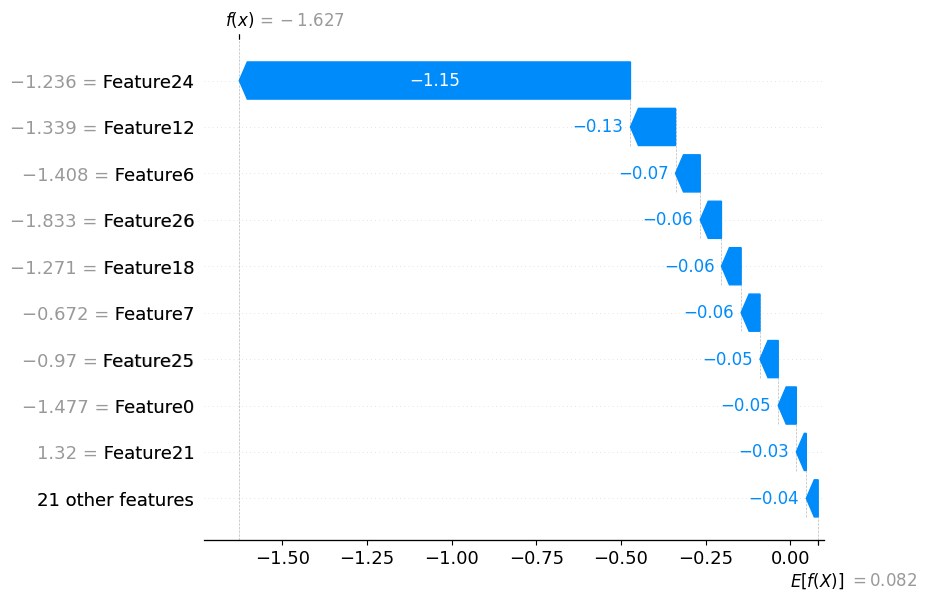

In [1]:
import shap
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


# Load a sample dataset
base_path  =f'/home/../multiTS/NFT/data/chorales/chorales_5l_1h/'
X_train, X_test = pd.read_pickle(f'{base_path}train_X.pkl'), pd.read_pickle(f'{base_path}test_X.pkl')
y_train, y_test = pd.read_pickle(f'{base_path}train_y.pkl'), pd.read_pickle(f'{base_path}test_y.pkl')

X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)
y_train, y_test = y_train.reshape(y_train.shape[0], -1), y_test.reshape(y_test.shape[0], -1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Train a model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set with additivity check disabled
shap_values = explainer(X_test, check_additivity=False)

instance_index = 0  # Change this as needed for different instances
output_index = 0    # Change this as needed for different outputs

# Assuming shap_values is the result you got from explainer(X_test)
# and it follows the structure (num_instances, num_features, num_outputs)
shap_values_for_output = shap_values[instance_index, :, output_index]

# Create a SHAP explanation object manually, as the shap.Explanation object might be needed
expl = shap.Explanation(values=shap_values_for_output,
                        base_values=shap_values.base_values[output_index],
                        data=X_test[instance_index],
                        feature_names=["Feature" + str(i) for i in range(shap_values_for_output.shape[0])])

# Now, try plotting the waterfall chart
shap.plots.waterfall(expl)
